In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array

from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from datetime import datetime

In [2]:
# 이미지 증강 객체 생성
gen = ImageDataGenerator(rescale=1./255)

# 증강 이미지 적용 및 실행
data_path = '/python/animalface/'
batch_size = 24000
data_gen = gen.flow_from_directory(directory=data_path, batch_size=batch_size,
                                   shuffle=True, target_size=(64, 64),
                                   class_mode='categorical')

Found 24000 images belonging to 12 classes.


In [3]:
img, label = data_gen.next()
print(len(img))

24000


In [4]:
result = []
for i in range(24000):
    result.append(np.argmax(label[i]))
result = np.array(result).reshape(-1, 1)

print(result.shape)

(24000, 1)


In [5]:
# train_data, test_data split
x_train, x_test, y_train, y_test = train_test_split(
    img, result, test_size=0.3, shuffle=True)

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (16800, 64, 64, 3)
x_test : (7200, 64, 64, 3)
y_train : (16800, 1)
y_test : (7200, 1)


In [6]:
# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=12)

print(y_train.shape)
print(y_test.shape)

(16800, 12)
(7200, 12)


In [7]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu',
               input_shape=(64, 64, 3)))
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# cnn.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# cnn.add(MaxPooling2D(pool_size=(2, 2)))
# cnn.add(Dropout(0.25))

# cnn.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(12, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

In [8]:
start_time = datetime.now()

cnn.compile(loss='categorical_crossentropy',
            optimizer=Adam(), metrics=['accuracy'])

# 손실함수를 10 epochs 마다 검사하여 더 이상 줄어들지 않으면 종료
# EarlyStopping(모니터링 값, 대기 epochs)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# 학습 중인 모델을 자동 저장
model_checkpoint = ModelCheckpoint(filepath='C:/python/animalface/face64ver.h5',
                                   monitor='val_loss',
                                   save_base_only=True,
                                   verbose=1)

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=300,
               validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

end_time = datetime.now()

print('경과시간 =', end_time - start_time)

Epoch 1/300
132/132 [==============================] - ETA: 0s - loss: 2.4105 - accuracy: 0.1326
Epoch 1: saving model to C:/python/animalface\face96ver.h5
132/132 [==============================] - 157s 1s/step - loss: 2.4105 - accuracy: 0.1326 - val_loss: 2.3673 - val_accuracy: 0.1460
Epoch 2/300
132/132 [==============================] - ETA: 0s - loss: 2.2756 - accuracy: 0.1909
Epoch 2: saving model to C:/python/animalface\face96ver.h5
132/132 [==============================] - 142s 1s/step - loss: 2.2756 - accuracy: 0.1909 - val_loss: 2.1947 - val_accuracy: 0.2342
Epoch 3/300
132/132 [==============================] - ETA: 0s - loss: 2.1939 - accuracy: 0.2302
Epoch 3: saving model to C:/python/animalface\face96ver.h5
132/132 [==============================] - 140s 1s/step - loss: 2.1939 - accuracy: 0.2302 - val_loss: 2.1315 - val_accuracy: 0.2676
Epoch 4/300
132/132 [==============================] - ETA: 0s - loss: 2.1198 - accuracy: 0.2625
Epoch 4: saving model to C:/python/anim

In [9]:
cnn.evaluate(x_test, y_test)

225/225 [==============================] - 9s 40ms/step - loss: 0.7689 - accuracy: 0.8279


[0.7689065933227539, 0.82791668176651]

In [14]:
from tensorflow import keras

mod_path = '/python/animalface/face64ver.h5'
keras_mod = keras.models.load_model(mod_path)
converter = tf.lite.TFLiteConverter.from_keras_model(keras_mod)
tflite_model = converter.convert()
with tf.io.gfile.GFile('converted_model_animalface.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpqsw53dr2\assets


INFO:tensorflow:Assets written to: C:\Users\admin\AppData\Local\Temp\tmpqsw53dr2\assets


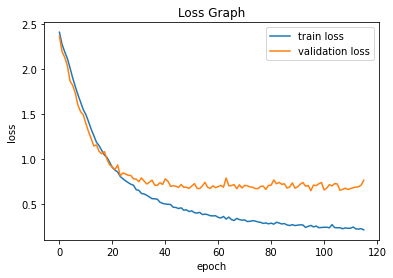

In [10]:
plt.title('Loss Graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

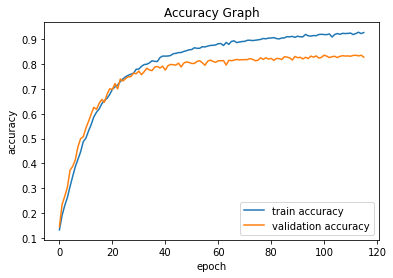

In [11]:
plt.title('Accuracy Graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [12]:
predictions = cnn.predict(x_test)
map = ['bear', 'cat', 'dinosaur', 'dog', 'fox', 'horse', 'lion', 'monkey', 'rabbit', 'squirrel', 'tiger', 'wolf']

print(predictions.dtype)
print(y_test.dtype)

print(predictions[0])
print(y_test[0])

225/225 [==============================] - 9s 40ms/step
float32
float32
[3.16289673e-03 1.10158569e-03 9.57991961e-06 9.05040801e-01
 1.70437694e-02 1.04456403e-05 4.21416620e-03 6.86390921e-02
 1.05341795e-04 3.91613663e-04 2.87999296e-06 2.77867832e-04]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


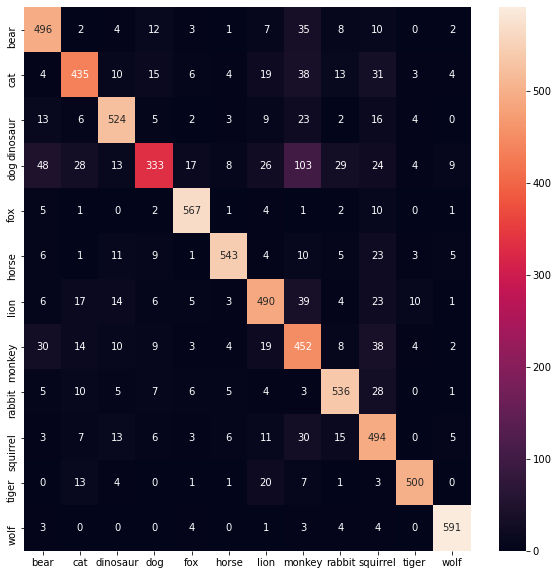

In [13]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=map, yticklabels=map)
plt.show()